In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [202]:
df = pd.read_csv("diamonds.csv", index_col=0)

In [203]:
df2 = df.copy()

In [204]:
df.shape

(53940, 10)

In [205]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [206]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [208]:
def check_outliers(column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_value = q1 - (1.5 * iqr)
    higher_value = q3 + (1.5 * iqr)
    return lower_value, higher_value

<Axes: ylabel='price'>

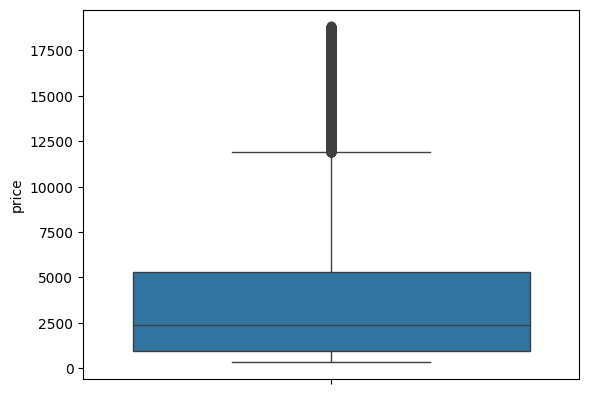

In [209]:
sns.boxplot(df["price"])

In [210]:
lower_value, higher_value = check_outliers("price")
lower_value, higher_value

(-5611.375, 11885.625)

In [211]:
df["price"] = df["price"].apply(
    lambda x: (
        lower_value if x < lower_value else (higher_value if x > higher_value else x)
    )
)

In [212]:
df["carat"].unique()

array([0.23, 0.21, 0.29, 0.31, 0.24, 0.26, 0.22, 0.3 , 0.2 , 0.32, 0.33,
       0.25, 0.35, 0.42, 0.28, 0.38, 0.7 , 0.86, 0.71, 0.78, 0.96, 0.73,
       0.8 , 0.75, 0.74, 0.81, 0.59, 0.9 , 0.91, 0.61, 0.77, 0.63, 0.76,
       0.64, 0.72, 0.79, 0.58, 1.17, 0.6 , 0.83, 0.54, 0.98, 0.52, 1.01,
       0.53, 0.84, 0.51, 1.05, 0.55, 0.87, 1.  , 0.57, 0.82, 1.04, 0.93,
       1.2 , 0.99, 0.34, 0.43, 0.36, 0.95, 0.89, 1.02, 0.97, 0.56, 0.85,
       0.92, 1.27, 0.66, 1.12, 0.68, 1.03, 0.62, 1.22, 1.08, 0.88, 0.5 ,
       1.19, 0.39, 0.65, 1.24, 1.5 , 0.27, 0.41, 1.13, 1.06, 0.69, 0.4 ,
       1.14, 0.94, 1.29, 1.52, 1.16, 1.21, 1.23, 1.09, 0.67, 1.11, 1.1 ,
       1.18, 1.15, 1.25, 1.07, 1.28, 1.51, 0.37, 1.31, 1.26, 1.39, 1.44,
       1.35, 1.3 , 1.32, 1.41, 1.36, 1.45, 1.34, 1.58, 1.54, 1.38, 1.33,
       1.74, 1.64, 1.47, 1.4 , 1.55, 1.95, 2.  , 1.37, 1.83, 1.62, 1.57,
       1.69, 2.06, 1.72, 1.66, 2.14, 1.49, 1.46, 2.15, 1.96, 2.22, 1.7 ,
       1.53, 1.85, 2.01, 2.27, 1.68, 1.56, 1.81, 1.

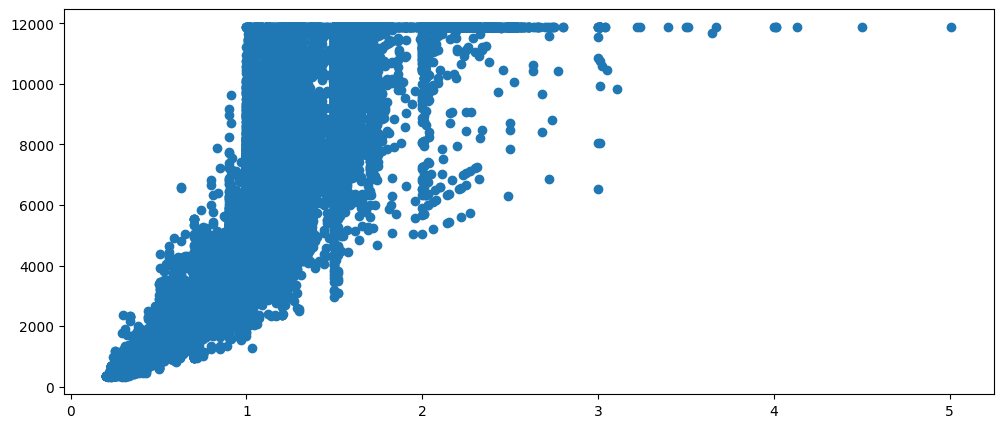

In [213]:
plt.figure(figsize=(12, 5))
plt.scatter(x="carat", y="price", data=df)

<Axes: ylabel='carat'>

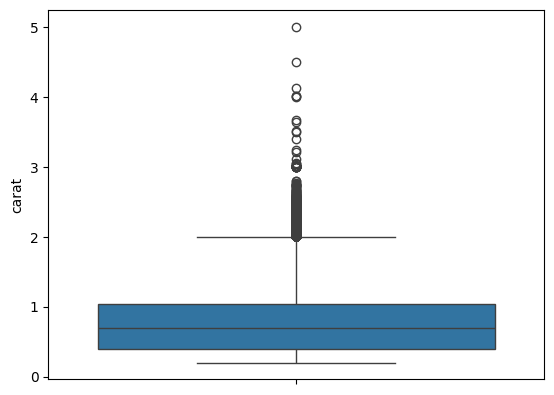

In [214]:
sns.boxplot(df["carat"])

In [215]:
lw, hw = check_outliers("carat")
lw, hw

(-0.5599999999999999, 2.0)

In [216]:
df["carat"] = df["carat"].apply(lambda x: (lw if x < lw else (lw if x > hw else x)))

<Axes: ylabel='carat'>

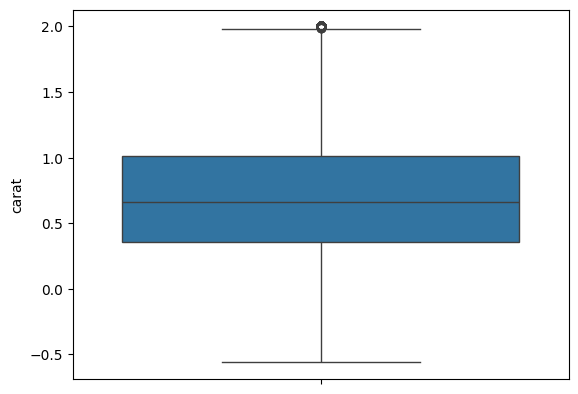

In [217]:
sns.boxplot(df["carat"])

In [218]:
df["cut"].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [219]:
df["Ideal"] = df["cut"].apply(lambda x: 1 if "Ideal" in x else 0)
df["Premium"] = df["cut"].apply(lambda x: 1 if "Premium" in x else 0)
df["Good"] = df["cut"].apply(lambda x: 1 if "Good" in x else 0)
df["Very Good"] = df["cut"].apply(lambda x: 1 if "Very Good" in x else 0)
df["Fair"] = df["cut"].apply(lambda x: 1 if "Fair" in x else 0)

In [220]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z', 'Ideal', 'Premium', 'Good', 'Very Good', 'Fair'],
      dtype='object')

In [221]:
df2["Ideal"], df2["Premium"], df2["Good"], df2["Very Good"], df2["Fair"] = (
    df["Ideal"],
    df["Premium"],
    df["Good"],
    df["Very Good"],
    df["Fair"],
)

In [222]:
# plt.bar(df["cut"], df["price"])

<Axes: xlabel='cut', ylabel='price'>

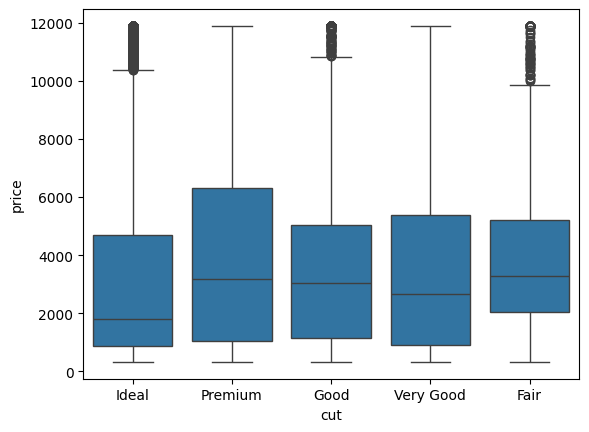

In [223]:
sns.boxplot(x="cut", y="price", data=df)

In [224]:
cut_stats = df.groupby("cut")["price"].describe()
cut_stats

,count,mean,std,min,25%,50%,75%,max
cut,,,,,,,,
Fair,1610.0,4181.654115,3041.290945,337.0,2050.25,3282.0,5205.50,11885.625
Good,4906.0,3757.335839,3169.585749,327.0,1145.00,3050.5,5028.00,11885.625
Ideal,21551.0,3296.565977,3325.925169,326.0,878.00,1810.0,4678.50,11885.625
Premium,13791.0,4302.705333,3675.427175,326.0,1046.00,3185.0,6296.00,11885.625
Very Good,12082.0,3787.707592,3395.946980,336.0,912.00,2648.0,5372.75,11885.625


In [225]:
q1 = df["price"].quantile(0.25)
q3 = df["price"].quantile(0.75)
iqr = q3 - q1
lower_value = q1 - (1.5 * iqr)
higher_value = q3 + (1.5 * iqr)

df["price"].apply(
    lambda x: (
        lower_value if x < lower_value else (higher_value if x > higher_value else x)
    )
).max()

11885.625

In [226]:
df["color"].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [227]:
df["color"].value_counts()

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

In [228]:
df2

,carat,cut,color,clarity,depth,table,price,x,y,z,Ideal,Premium,Good,Very Good,Fair
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1,0,0,0,0
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,0,1,0,0,0
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0,0,1,0,0
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0,1,0,0,0
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,1,0,0,0,0
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,0,0,1,0,0
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,0,0,1,1,0
53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,0,1,0,0,0


In [229]:
df["color_G"] = df["color"].apply(lambda x: 1 if "G" in x else 0)
df["color_E"] = df["color"].apply(lambda x: 1 if "E" in x else 0)
df["color_F"] = df["color"].apply(lambda x: 1 if "F" in x else 0)
df["color_H"] = df["color"].apply(lambda x: 1 if "H" in x else 0)
df["color_D"] = df["color"].apply(lambda x: 1 if "D" in x else 0)
df["color_I"] = df["color"].apply(lambda x: 1 if "I" in x else 0)
df["color_J"] = df["color"].apply(lambda x: 1 if "J" in x else 0)

In [230]:
(
    df2["color_G"],
    df2["color_E"],
    df2["color_F"],
    df2["color_H"],
    df2["color_D"],
    df2["color_I"],
    df2["color_J"],
) = (
    df["color_G"],
    df["color_E"],
    df["color_F"],
    df["color_H"],
    df["color_D"],
    df["color_I"],
    df["color_J"],
)

In [231]:
df["clarity"].value_counts()

clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64

In [232]:
df["clarity"].value_counts()

clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64

In [233]:
df["clarity"].value_counts()

clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64

In [234]:
# plt.bar(df["color"], df["price"])

<Axes: xlabel='color', ylabel='price'>

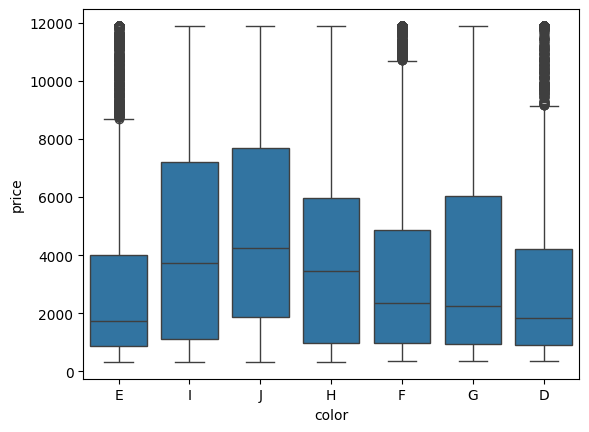

In [235]:
sns.boxplot(x="color", y="price", data=df)

<Axes: ylabel='depth'>

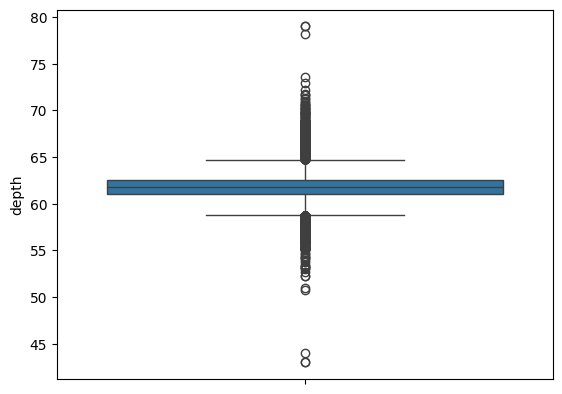

In [236]:
sns.boxplot(df["depth"])

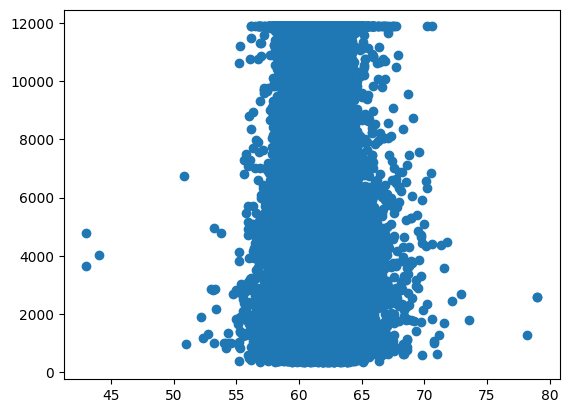

In [237]:
plt.scatter(df["depth"], df["price"])

In [238]:
lw, hw = check_outliers("depth")
lw, hw

(58.75, 64.75)

In [239]:
df["depth"] = df["depth"].apply(lambda x: (lw if x < lw else (lw if x > hw else x)))

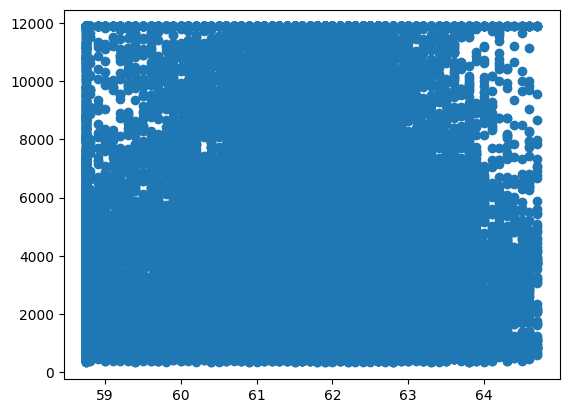

In [240]:
plt.scatter(df["depth"], df["price"])

<Axes: ylabel='depth'>

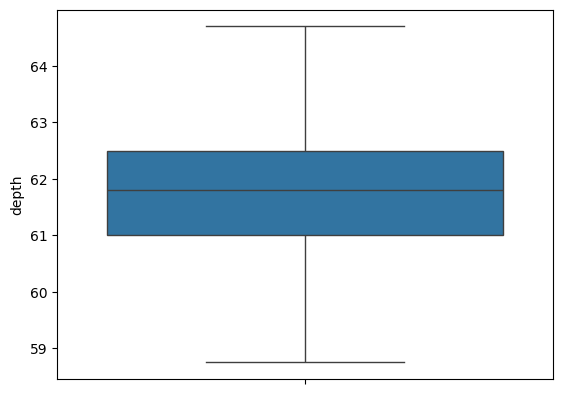

In [241]:
sns.boxplot(df["depth"])

In [242]:
df["clarity"].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [243]:
df["clarity"].value_counts()

clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64

In [244]:
df["clarity"].value_counts()

clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64

In [245]:
df["clr_SI1"] = df["clarity"].apply(lambda x: 1 if "SI1" in x else 0)
df["clr_VS2"] = df["clarity"].apply(lambda x: 1 if "VS2" in x else 0)
df["clr_SI2"] = df["clarity"].apply(lambda x: 1 if "SI1" in x else 0)
df["clr_VS1"] = df["clarity"].apply(lambda x: 1 if "VS1" in x else 0)
df["clr_VVS2"] = df["clarity"].apply(lambda x: 1 if "VVS1" in x else 0)
df["clr_VVS1"] = df["clarity"].apply(lambda x: 1 if "VVS1" in x else 0)
df["clr_IF"] = df["clarity"].apply(lambda x: 1 if "IF" in x else 0)
df["clr_I1"] = df["clarity"].apply(lambda x: 1 if "I1" in x else 0)

In [246]:
(
    df2["clr_SI1"],
    df2["clr_VS2"],
    df2["clr_SI2"],
    df2["clr_VS1"],
    df2["clr_VVS2"],
    df2["clr_VVS1"],
    df2["clr_IF"],
    df2["clr_I1"],
) = (
    df["clr_SI1"],
    df["clr_VS2"],
    df["clr_SI2"],
    df["clr_VS2"],
    df["clr_VVS2"],
    df["clr_VVS1"],
    df["clr_IF"],
    df["clr_I1"],
)

In [247]:
df["clarity"].value_counts()

clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64

In [248]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z,...,color_I,color_J,clr_SI1,clr_VS2,clr_SI2,clr_VS1,clr_VVS2,clr_VVS1,clr_IF,clr_I1
1,0.23,Ideal,E,SI2,61.50,55.0,326.0,3.95,3.98,2.43,...,0,0,0,0,0,0,0,0,0,0
2,0.21,Premium,E,SI1,59.80,61.0,326.0,3.89,3.84,2.31,...,0,0,1,0,1,0,0,0,0,1
3,0.23,Good,E,VS1,58.75,65.0,327.0,4.05,4.07,2.31,...,0,0,0,0,0,1,0,0,0,0
4,0.29,Premium,I,VS2,62.40,58.0,334.0,4.20,4.23,2.63,...,1,0,0,1,0,0,0,0,0,0
5,0.31,Good,J,SI2,63.30,58.0,335.0,4.34,4.35,2.75,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53936,0.72,Ideal,D,SI1,60.80,57.0,2757.0,5.75,5.76,3.50,...,0,0,1,0,1,0,0,0,0,1
53937,0.72,Good,D,SI1,63.10,55.0,2757.0,5.69,5.75,3.61,...,0,0,1,0,1,0,0,0,0,1
53938,0.70,Very Good,D,SI1,62.80,60.0,2757.0,5.66,5.68,3.56,...,0,0,1,0,1,0,0,0,0,1
53939,0.86,Premium,H,SI2,61.00,58.0,2757.0,6.15,6.12,3.74,...,0,0,0,0,0,0,0,0,0,0


In [249]:
df["table"].unique()

array([55. , 61. , 65. , 58. , 57. , 56. , 54. , 62. , 59. , 63. , 60. ,
       55.3, 69. , 53. , 64. , 56.4, 60.5, 67. , 52. , 55.8, 66. , 70. ,
       68. , 54.4, 57.1, 53.6, 54.8, 54.2, 54.9, 56.7, 53.9, 57.8, 54.1,
       55.1, 51. , 58.1, 56.9, 56.5, 53.7, 60.7, 56.2, 56.6, 56.1, 56.3,
       57.2, 57.5, 60.9, 59.8, 62.3, 60.1, 55.9, 50.1, 62.2, 54.5, 55.7,
       53.4, 54.7, 58.8, 59.4, 62.5, 54.3, 60.6, 55.2, 58.6, 49. , 50. ,
       54.6, 62.6, 57.7, 56.8, 57.9, 60.3, 55.6, 59.5, 57.4, 62.4, 60.4,
       53.3, 60.2, 60.8, 58.5, 57.6, 43. , 59.9, 63.5, 57.3, 61.4, 58.3,
       55.4, 58.2, 53.5, 59.7, 55.5, 58.7, 53.8, 59.1, 53.2, 59.3, 61.1,
       51.6, 95. , 61.2, 59.2, 58.4, 53.1, 52.8, 44. , 61.3, 61.9, 61.8,
       59.6, 61.5, 58.9, 64.3, 62.8, 71. , 52.4, 63.3, 61.7, 64.2, 73. ,
       65.4, 63.4, 62.1, 79. , 76. , 61.6])

<Axes: ylabel='table'>

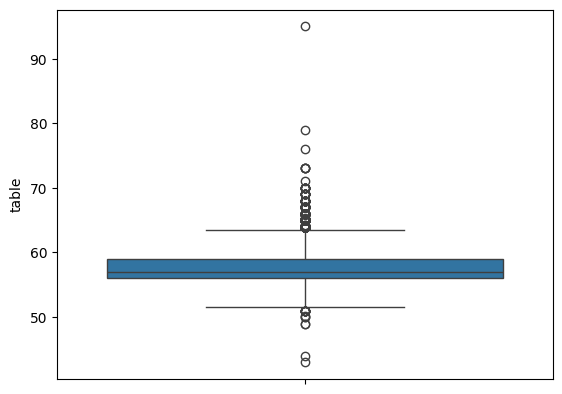

In [250]:
sns.boxplot(df["table"])

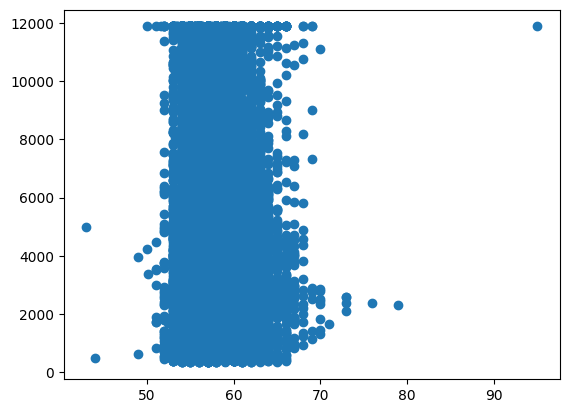

In [251]:
plt.scatter(df["table"], df["price"])

In [252]:
lw, hw = check_outliers("table")

In [253]:
df["table"] = df["table"].apply(lambda x: (lw if x < lw else (lw if x > hw else x)))

<Axes: ylabel='table'>

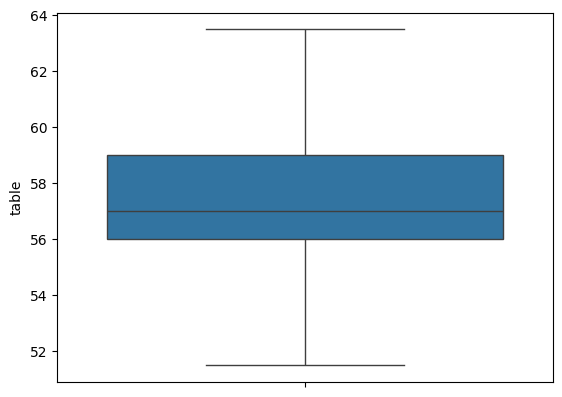

In [254]:
sns.boxplot(df["table"])

In [255]:
df["x"].unique()

array([ 3.95,  3.89,  4.05,  4.2 ,  4.34,  3.94,  4.07,  3.87,  4.  ,
        4.25,  3.93,  3.88,  4.35,  3.79,  4.38,  4.31,  4.23,  4.21,
        4.26,  3.85,  4.39,  4.44,  3.97,  4.28,  3.96,  4.04,  4.01,
        3.92,  4.06,  3.83,  4.29,  4.13,  4.49,  3.99,  4.19,  4.24,
        4.36,  4.33,  4.02,  4.45,  3.91,  4.3 ,  4.43,  4.54,  4.78,
        4.15,  4.08,  4.03,  4.65,  4.22,  5.7 ,  6.45,  5.68,  5.81,
        5.85,  5.71,  6.27,  5.77,  5.97,  5.8 ,  6.  ,  5.94,  5.87,
        5.9 ,  6.14,  5.38,  5.96,  6.16,  5.73,  5.98,  5.72,  6.01,
        5.64,  5.57,  5.63,  5.65,  6.09,  5.56,  6.11,  6.03,  5.89,
        5.69,  5.62,  5.88,  5.52,  5.74,  5.53,  5.78,  5.83,  5.66,
        5.82,  5.79,  5.92,  5.39,  5.33,  6.83,  5.41,  5.25,  5.24,
        5.67,  5.61,  5.76,  6.05,  5.6 ,  5.19,  5.84,  6.39,  5.34,
        5.14,  5.11,  5.54,  6.07,  6.29,  6.31,  6.49,  5.28,  5.48,
        5.55,  6.41,  6.02,  5.91,  6.17,  6.61,  5.12,  6.19,  5.43,
        5.99,  5.95,

Text(0, 0.5, 'price')

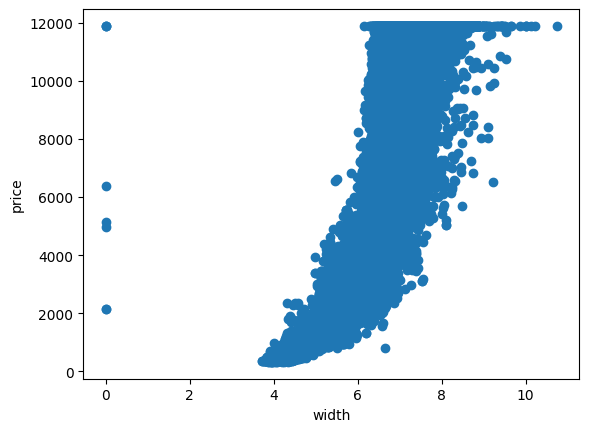

In [256]:
plt.scatter(df["x"], df["price"])
plt.xlabel("width")
plt.ylabel("price")

<Axes: ylabel='x'>

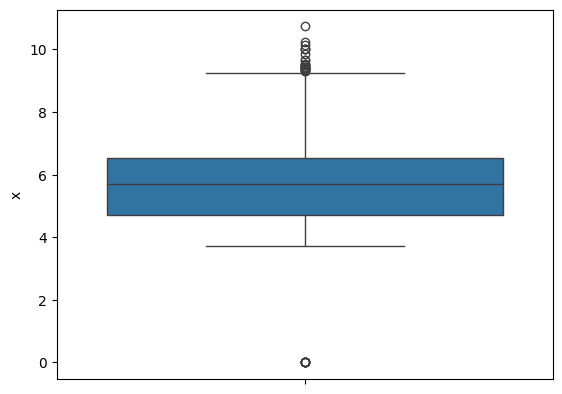

In [257]:
sns.boxplot(df["x"])

In [258]:
lw, hw = check_outliers("x")

In [259]:
df["x"] = df["x"].apply(lambda x: (lw if x < lw else (lw if x > hw else x)))

<Axes: ylabel='x'>

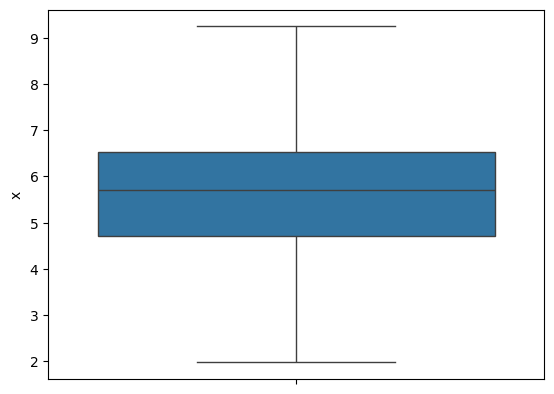

In [260]:
sns.boxplot(df["x"])

Text(0, 0.5, 'price')

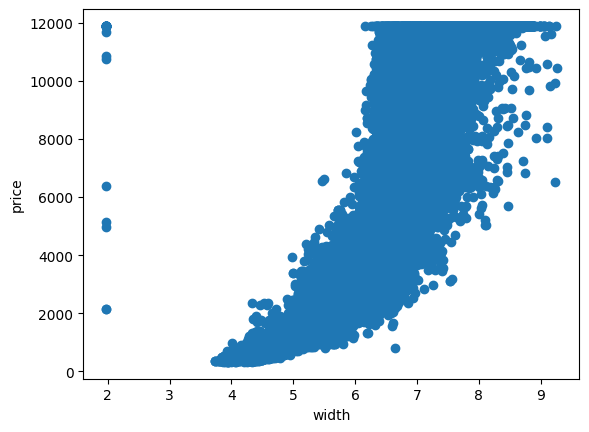

In [261]:
plt.scatter(df["x"], df["price"])
plt.xlabel("width")
plt.ylabel("price")

In [262]:
df["y"].unique()

array([ 3.98,  3.84,  4.07,  4.23,  4.35,  3.96,  4.11,  3.78,  4.05,
        4.28,  3.9 ,  4.37,  3.75,  4.42,  4.34,  4.29,  4.26,  4.27,
        4.3 ,  3.92,  4.43,  4.47,  4.01,  3.94,  3.97,  3.99,  4.03,
        4.06,  4.08,  3.85,  4.31,  4.16,  4.51,  4.5 ,  4.55,  4.02,
        4.24,  4.38,  3.95,  4.48,  3.89,  3.88,  4.33,  4.32,  4.59,
        4.84,  4.22,  4.  ,  4.25,  4.13,  4.09,  4.04,  4.12,  4.67,
        5.72,  6.33,  5.67,  5.73,  5.85,  5.9 ,  5.76,  5.95,  5.78,
        5.93,  5.75,  5.96,  5.79,  5.87,  5.8 ,  5.81,  6.11,  5.43,
        6.  ,  5.84,  6.12,  5.82,  5.74,  5.94,  6.07,  5.69,  5.83,
        5.61,  5.53,  5.58,  5.59,  5.97,  6.09,  5.99,  5.86,  5.68,
        5.65,  5.55,  5.77,  5.91,  5.56,  5.89,  5.92,  6.03,  5.44,
        5.37,  5.88,  6.9 ,  5.62,  5.27,  5.26,  5.7 ,  5.64,  5.63,
        5.71,  5.51,  5.22,  6.36,  5.54,  5.66,  6.2 ,  5.18,  5.15,
        6.1 ,  6.21,  6.22,  6.45,  6.01,  5.3 ,  5.41,  5.52,  6.27,
        6.05,  6.06,

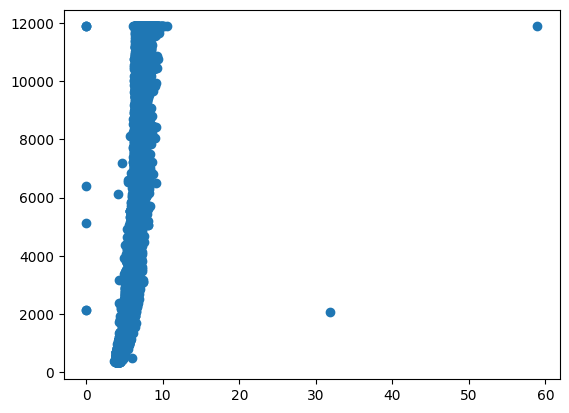

In [263]:
plt.scatter(df["y"], df["price"])

<Axes: ylabel='y'>

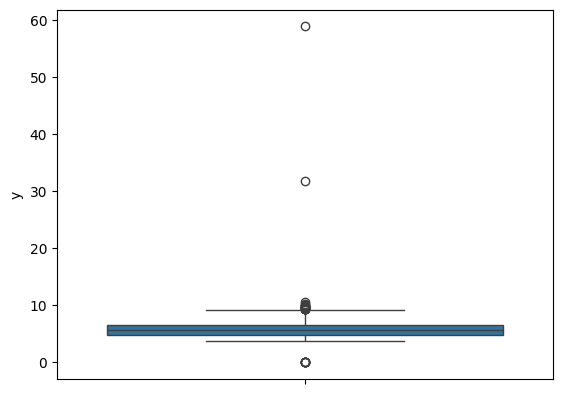

In [264]:
sns.boxplot(df["y"])

In [265]:
lw, hw = check_outliers("y")

In [266]:
df["y"] = df["y"].apply(lambda x: (lw if x < lw else (lw if x > hw else x)))

In [267]:
df["z"].unique()

array([ 2.43,  2.31,  2.63,  2.75,  2.48,  2.47,  2.53,  2.49,  2.39,
        2.73,  2.46,  2.33,  2.71,  2.27,  2.68,  2.7 ,  2.66,  2.41,
        2.62,  2.59,  2.67,  2.4 ,  2.42,  2.44,  2.37,  2.52,  2.78,
        2.76,  2.61,  2.65,  2.79,  2.54,  2.64,  2.45,  2.72,  2.69,
        2.96,  2.58,  2.51,  2.56,  2.55,  2.87,  3.57,  3.52,  3.5 ,
        3.56,  3.72,  3.38,  3.4 ,  4.07,  3.66,  3.65,  3.58,  3.59,
        3.63,  3.69,  3.61,  3.6 ,  3.35,  3.67,  3.62,  3.87,  3.68,
        3.49,  3.47,  3.46,  3.7 ,  3.32,  3.93,  3.95,  3.64,  3.53,
        3.37,  3.43,  3.51,  3.54,  3.48,  3.55,  3.33,  3.3 ,  4.13,
        3.79,  3.24,  3.23,  4.08,  3.19,  3.94,  3.08,  3.31,  3.21,
        3.75,  3.18,  3.41,  4.03,  4.09,  3.22,  4.18,  3.76,  3.83,
        3.17,  3.44,  3.74,  3.8 ,  3.39,  3.88,  4.  ,  3.98,  3.85,
        3.96,  3.16,  3.78,  3.84,  4.33,  4.01,  3.45,  2.74,  2.95,
        2.8 ,  2.77,  2.9 ,  2.82,  3.77,  3.9 ,  3.73,  3.34,  3.86,
        3.89,  3.81,

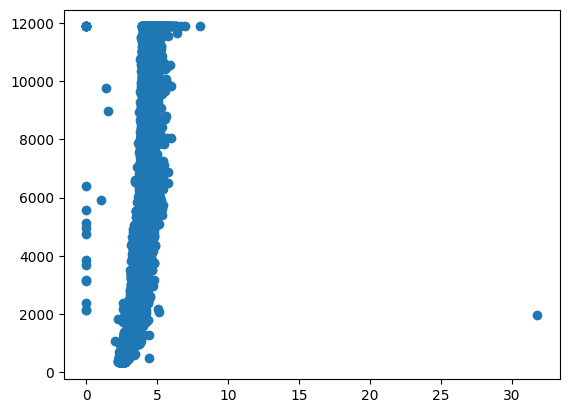

In [268]:
plt.scatter(df["z"], df["price"])

<Axes: ylabel='z'>

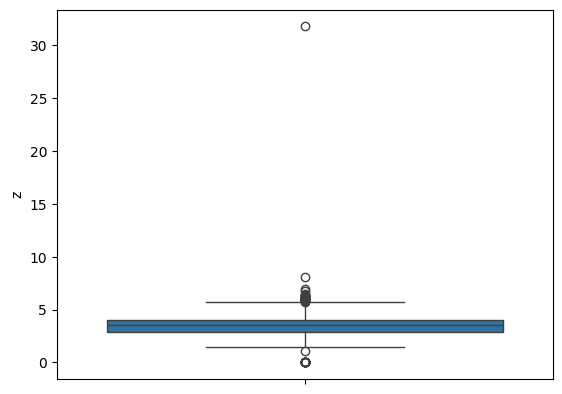

In [269]:
sns.boxplot(df["z"])

In [270]:
lw, hw = check_outliers("z")

In [271]:
df["z"] = df["z"].apply(lambda x: (lw if x < lw else (lw if x > hw else x)))

In [272]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z,...,color_I,color_J,clr_SI1,clr_VS2,clr_SI2,clr_VS1,clr_VVS2,clr_VVS1,clr_IF,clr_I1
1,0.23,Ideal,E,SI2,61.50,55.0,326.0,3.95,3.98,2.43,...,0,0,0,0,0,0,0,0,0,0
2,0.21,Premium,E,SI1,59.80,61.0,326.0,3.89,3.84,2.31,...,0,0,1,0,1,0,0,0,0,1
3,0.23,Good,E,VS1,58.75,51.5,327.0,4.05,4.07,2.31,...,0,0,0,0,0,1,0,0,0,0
4,0.29,Premium,I,VS2,62.40,58.0,334.0,4.20,4.23,2.63,...,1,0,0,1,0,0,0,0,0,0
5,0.31,Good,J,SI2,63.30,58.0,335.0,4.34,4.35,2.75,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53936,0.72,Ideal,D,SI1,60.80,57.0,2757.0,5.75,5.76,3.50,...,0,0,1,0,1,0,0,0,0,1
53937,0.72,Good,D,SI1,63.10,55.0,2757.0,5.69,5.75,3.61,...,0,0,1,0,1,0,0,0,0,1
53938,0.70,Very Good,D,SI1,62.80,60.0,2757.0,5.66,5.68,3.56,...,0,0,1,0,1,0,0,0,0,1
53939,0.86,Premium,H,SI2,61.00,58.0,2757.0,6.15,6.12,3.74,...,0,0,0,0,0,0,0,0,0,0


In [273]:
df2

,carat,cut,color,clarity,depth,table,price,x,y,z,...,color_I,color_J,clr_SI1,clr_VS2,clr_SI2,clr_VS1,clr_VVS2,clr_VVS1,clr_IF,clr_I1
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,...,0,0,0,0,0,0,0,0,0,0
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,...,0,0,1,0,1,0,0,0,0,1
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,...,0,0,0,0,0,0,0,0,0,0
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,...,1,0,0,1,0,1,0,0,0,0
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,...,0,0,1,0,1,0,0,0,0,1
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,...,0,0,1,0,1,0,0,0,0,1
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,...,0,0,1,0,1,0,0,0,0,1
53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,...,0,0,0,0,0,0,0,0,0,0


In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53940 entries, 1 to 53940
Data columns (total 30 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53940 non-null  float64
 1   cut        53940 non-null  object 
 2   color      53940 non-null  object 
 3   clarity    53940 non-null  object 
 4   depth      53940 non-null  float64
 5   table      53940 non-null  float64
 6   price      53940 non-null  float64
 7   x          53940 non-null  float64
 8   y          53940 non-null  float64
 9   z          53940 non-null  float64
 10  Ideal      53940 non-null  int64  
 11  Premium    53940 non-null  int64  
 12  Good       53940 non-null  int64  
 13  Very Good  53940 non-null  int64  
 14  Fair       53940 non-null  int64  
 15  color_G    53940 non-null  int64  
 16  color_E    53940 non-null  int64  
 17  color_F    53940 non-null  int64  
 18  color_H    53940 non-null  int64  
 19  color_D    53940 non-null  int64  
 20  color_I    

In [275]:
df = df.drop(columns=["cut", "color", "clarity"])

In [276]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [277]:
df.columns

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'Ideal', 'Premium',
       'Good', 'Very Good', 'Fair', 'color_G', 'color_E', 'color_F', 'color_H',
       'color_D', 'color_I', 'color_J', 'clr_SI1', 'clr_VS2', 'clr_SI2',
       'clr_VS1', 'clr_VVS2', 'clr_VVS1', 'clr_IF', 'clr_I1'],
      dtype='object')

In [278]:
df2.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z', 'Ideal', 'Premium', 'Good', 'Very Good', 'Fair', 'color_G',
       'color_E', 'color_F', 'color_H', 'color_D', 'color_I', 'color_J',
       'clr_SI1', 'clr_VS2', 'clr_SI2', 'clr_VS1', 'clr_VVS2', 'clr_VVS1',
       'clr_IF', 'clr_I1'],
      dtype='object')

In [279]:
x = df[
    [
        "carat",
        "depth",
        "table",
        "x",
        "y",
        "z",
        "Ideal",
        "Premium",
        "Good",
        "Very Good",
        "Fair",
        "color_G",
        "color_E",
        "color_F",
        "color_H",
        "color_D",
        "color_I",
        "color_J",
        "clr_SI1",
        "clr_VS2",
        "clr_SI2",
        "clr_VS1",
        "clr_VVS2",
        "clr_VVS1",
        "clr_IF",
        "clr_I1",
    ]
]
y = df["price"]

In [280]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.20, random_state=42
)

In [281]:
x_train.shape, y_train.shape

((43152, 26), (43152,))

In [282]:
lr = LinearRegression()

In [283]:
lr.fit(x_train, y_train)

LinearRegression()

In [284]:
y_pred = lr.predict(x_test)

In [285]:
y_pred

array([-510., 3128., 1429., ...,  266., 7930., 3919.])

In [286]:
y_test

1389      559.0
50053    2201.0
41646    1238.0
42378    1304.0
17245    6901.0
          ...  
44082    1554.0
23714     633.0
31376     761.0
21773    9836.0
4999     3742.0
Name: price, Length: 10788, dtype: float64

In [287]:
r2_score(y_test, y_pred)

0.8724407304163879

In [288]:
x1 = df2[
    [
        "carat",
        "depth",
        "table",
        "x",
        "y",
        "z",
        "Ideal",
        "Premium",
        "Good",
        "Very Good",
        "Fair",
        "color_G",
        "color_E",
        "color_F",
        "color_H",
        "color_D",
        "color_I",
        "color_J",
        "clr_SI1",
        "clr_VS2",
        "clr_SI2",
        "clr_VS1",
        "clr_VVS2",
        "clr_VVS1",
        "clr_IF",
        "clr_I1",
    ]
]
y1 = df2["price"]

In [289]:
x_train, x_test, y_train, y_test = train_test_split(
    x1, y1, test_size=0.20, random_state=42
)

In [290]:
lr = LinearRegression()

In [291]:
lr.fit(x_train, y_train)

LinearRegression()

In [292]:
y_pred = lr.predict(x_test)

In [293]:
y_pred

array([ 944., 2727., 1529., ...,  994., 7637., 3936.])

In [294]:
y_test

1389      559
50053    2201
41646    1238
42378    1304
17245    6901
         ... 
44082    1554
23714     633
31376     761
21773    9836
4999     3742
Name: price, Length: 10788, dtype: int64

In [295]:
r2_score(y_pred, y_test)

0.8917963465991858

In [296]:
from sklearn.metrics import mean_squared_error

In [299]:
mean_squared_error(y_pred,y_test)

1569839.8622543567